# Intro to Matlab

As a demo of the language, plot sin and cos on the same axis:

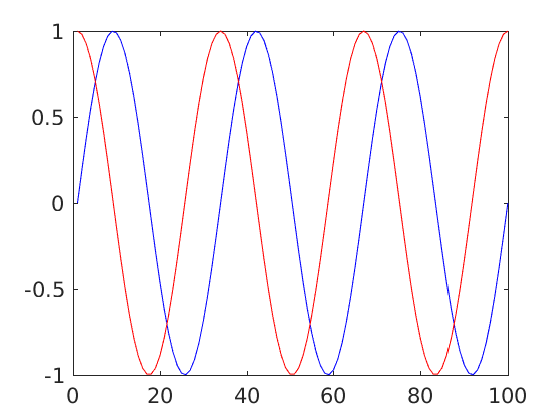

In [1]:
% define a linear space of points (start, end, npoints)
t = linspace(0,6*pi,100);

% plot the sin of these points
plot(sin(t), 'b');

% keep the plot open
hold on;

% plot the cos of the points
plot(cos(t), 'r')

# Netcdf

In [2]:
data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc';
variable = 'AirTC_Avg';

In [3]:
AirTData  = ncread(data_url, variable);
AirTUnits = ncreadatt(data_url, variable, 'units');

In [4]:
timeData = ncread(data_url, 'time');
timeUnits = ncreadatt(data_url, 'time', 'units');

In [5]:
% convert time to a vector of datetimes
time = datetime( timeData, 'ConvertFrom', 'posixtime' );

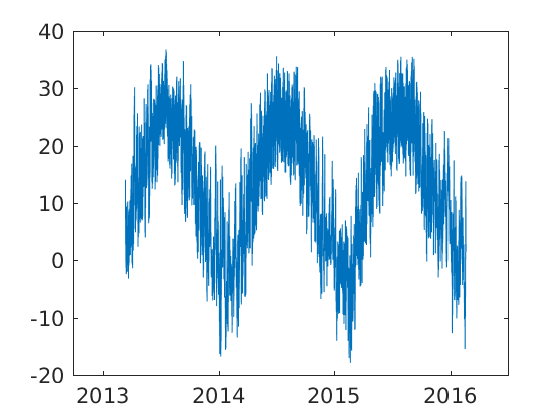

In [6]:
plot(time, AirTData)

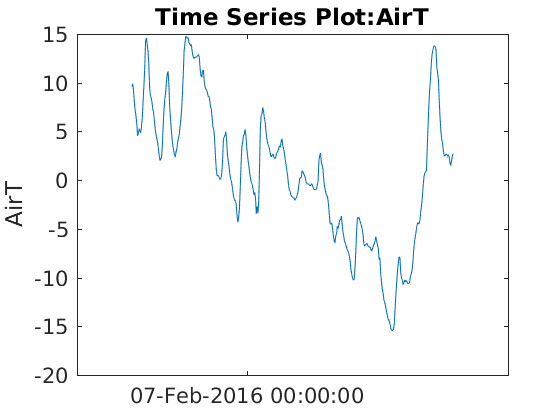

In [7]:
% define a timeseries (data, time as datestring, 'Name', variable name)
ts = timeseries(AirTData, datestr(time), 'Name', 'AirT');

% slice the timeseries with a start and end date, then set the name again
ts1 = getsampleusingtime(ts,'2016-02-01','2016-02-29');
set(ts1, 'Name', 'AirT')

% plot the February data
plot(ts1)